# Word embeddings
The semantic relationships is accurately defined by the word embeddings.
Consider the ambiguity in the following tweet


> I love apple <3

We as a human has a sense to apply the real world knowledge to the text and say it is the company which produces tech and the user is referring to that bramd but if this is fed to a machine, it assumes apple as a fruit.


> Word embedding is the feature learning technique where words from the vocabulary are mapped to vectors of real numbers capturing the contextual hierarchy.

## word2vec

There are 2 important models in word2vec

*   Skip-Gram
*   Continuous Bag of Words (CBOW)








In [0]:
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
                  ['nlp', 'is', 'future'],
                  ['nlp', 'saves', 'time', 'and', 'solves',
                   'lot', 'of', 'industry', 'problems'],
                  ['nlp', 'uses', 'machine', 'learning']]


In [2]:
# Skip-Gram model

#import library
!pip install gensim
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [3]:
# training the model
skipgram = Word2Vec(sentences, size =50, window = 3, min_count=1, sg = 1)
print(skipgram)
# access vector for one word
print(skipgram['nlp'])

Word2Vec(vocab=21, size=50, alpha=0.025)
[ 6.5020920e-04  7.5510582e-03 -6.0342811e-03 -5.0931554e-03
 -8.2146470e-03 -5.9893238e-03  8.5821170e-03  3.7544668e-03
 -9.4358353e-03  4.8375274e-03  8.4738107e-03 -8.1783412e-03
 -8.8442536e-04 -4.3156431e-03 -1.8321838e-03  2.2774222e-03
 -1.1265849e-03 -5.3669773e-03  3.7409891e-03 -4.1522817e-03
  1.3814480e-03  8.3978809e-03  8.1314743e-03  5.9150564e-03
 -3.3503056e-03  5.8952998e-03 -1.9304901e-03  6.9665967e-04
 -9.0868101e-03  5.4320674e-03 -1.2063553e-03  6.9817947e-03
  5.8387341e-03 -6.6061533e-04 -5.1216707e-03  9.3835462e-03
  2.1320714e-03  2.9908796e-03 -2.0981187e-03 -8.3244573e-03
 -8.5101994e-05 -6.3144468e-04  3.7917022e-03 -9.6303485e-03
 -8.5533848e-03  6.6740154e-03 -2.7782794e-03 -4.0437365e-03
 -5.6205019e-03 -3.7068776e-03]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [4]:
# access vector for another one word
print(skipgram['deep'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [5]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


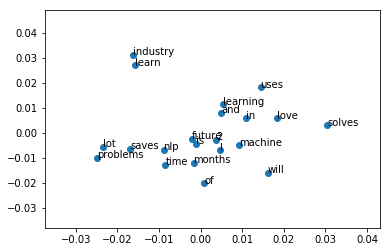

In [6]:
# T – SNE plot is one of the ways to evaluate word embeddings.
# Let’s generate it and see how it looks.
# T – SNE plot
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [9]:
#import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# training the model
cbow = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 1) 

print(cbow)


Word2Vec(vocab=21, size=50, alpha=0.025)


In [10]:
# access vector for one word
print(cbow['nlp'])


[ 6.5020920e-04  7.5510582e-03 -6.0342811e-03 -5.0931554e-03
 -8.2146470e-03 -5.9893238e-03  8.5821170e-03  3.7544668e-03
 -9.4358353e-03  4.8375274e-03  8.4738107e-03 -8.1783412e-03
 -8.8442536e-04 -4.3156431e-03 -1.8321838e-03  2.2774222e-03
 -1.1265849e-03 -5.3669773e-03  3.7409891e-03 -4.1522817e-03
  1.3814480e-03  8.3978809e-03  8.1314743e-03  5.9150564e-03
 -3.3503056e-03  5.8952998e-03 -1.9304901e-03  6.9665967e-04
 -9.0868101e-03  5.4320674e-03 -1.2063553e-03  6.9817947e-03
  5.8387341e-03 -6.6061533e-04 -5.1216707e-03  9.3835462e-03
  2.1320714e-03  2.9908796e-03 -2.0981187e-03 -8.3244573e-03
 -8.5101994e-05 -6.3144468e-04  3.7917022e-03 -9.6303485e-03
 -8.5533848e-03  6.6740154e-03 -2.7782794e-03 -4.0437365e-03
 -5.6205019e-03 -3.7068776e-03]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
# save model
cbow.save('cbow.bin')
# load model
cbow = Word2Vec.load('cbow.bin')
# T – SNE plot
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


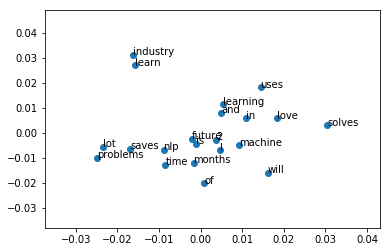

In [12]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# FastText

fastText is the improvised version of word2vec. word2vec basically considers words to build the representation. But fastText takes each character while computing the representation of the word.

In [0]:
# Import FastText
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [14]:
fast = FastText(sentences,size=20, window=1, min_count=1,
workers=5, min_n=1, max_n=2)
# vector for word nlp
print(fast['nlp'])

[-0.00457873  0.00607572 -0.01117205  0.00556346 -0.00782249 -0.01375918
  0.00674984 -0.00841166 -0.00319377  0.00924592  0.002137   -0.01064047
  0.01226169  0.00853122  0.0135972  -0.00256507  0.00818711 -0.00410288
 -0.00540261 -0.01359837]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [15]:
# vector for word deep
print(fast['deep'])

[ 0.00272998 -0.0024248  -0.00769168 -0.00395748  0.01148113 -0.00639981
  0.00637095 -0.01249581 -0.01206758  0.01400672 -0.00476895 -0.00231236
  0.02008674 -0.0195196   0.01556754 -0.01580737  0.00509422 -0.00957166
 -0.00963916 -0.02059008]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.




> The advantage of using fastText. The “deep” was not present in training of word2vec and we did not get a vector for that word. But since fastText is building on character level, even for the word that was not there in training, it will provide results. You can see the vector for the word “deep,” but it's not present in the input data.



In [19]:
# visualize
X = fast[fast.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


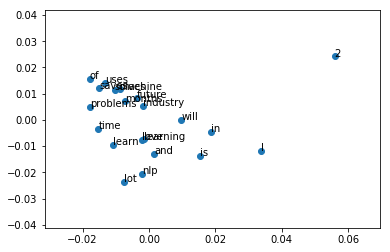

In [20]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.vocab)
for i, word in enumerate(words):
      pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()